# Task 1:Perform Data Cleaning

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns                         #importing libraries

In [3]:
gender_submission = pd.read_csv("gender_submission.csv")         #importing csv file
gender_submission.head()                                         #pritning top 5 rows of data

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [4]:
gender_submission.describe()                             #information of the data

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.363636
std,120.810458,0.481622
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


In [5]:
gender_submission.isnull().sum()                     #checking for missing values

PassengerId    0
Survived       0
dtype: int64

In [6]:
train_data=pd.read_csv("train.csv")                  #importing csv file
train_data.head()                                    #pritning top 5 rows of data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_data.dtypes                     #overview of data types of the data

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
train_data.describe()                   #brief details about data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train_data.duplicated().sum()

0

In [10]:
train_data.isnull().sum()                             #checking for missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

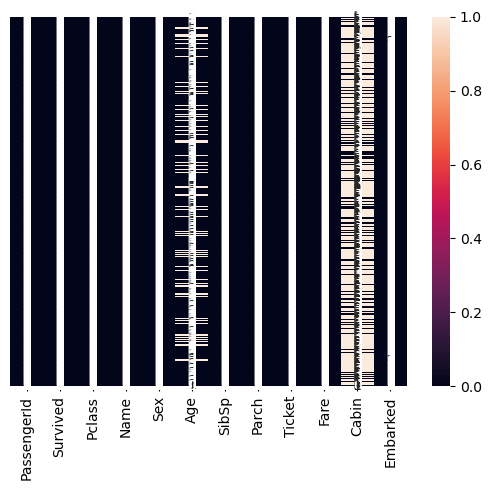

In [11]:
sns.heatmap(train_data.isnull(),yticklabels=False,annot=True)        #visualizing missing values through heatmap

In [12]:
medians=train_data.groupby(['Sex','Pclass',])[['Age']].median()
medians

Age
Sex    Pclass      
female 1       35.0
       2       28.0
       3       21.5
male   1       40.0
       2       30.0
       3       25.0

In [13]:
train_data['Age']=train_data.groupby(['Sex','Pclass'],group_keys=False)['Age'].apply(lambda x: x.fillna(x.median()))
#filling missing values in Age column using Median values based on Sex and Pclass values

In [14]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
mode=train_data.Embarked.mode()
mode

0    S
Name: Embarked, dtype: object

In [16]:
train_data['Embarked'].fillna('mode',inplace=True)     #filling missing values in Embarked column using Mode value

In [17]:
train_data.Embarked.isnull().sum()

0

In [18]:
train_data['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [19]:
train_data['Cabin'].mode()

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

In [20]:
train_data['Cabin'].fillna(train_data['Cabin'].mode()[0],inplace=True)
#filling missing values in Cabin column using Mode value

In [21]:
train_data.isnull().sum()                        #checking for any missing values

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [22]:
train_data.corr()                           #correlation of the data

/var/folders/rm/tgk_ks154yx0fr_2x_wz55980000gn/T/ipykernel_4251/1612053408.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()                           #correlation of the data


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.039033,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.059579,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.413583,0.083081,0.018443,-0.549500
Age,0.039033,-0.059579,-0.413583,1.000000,-0.249854,-0.175526,0.122692
SibSp,-0.057527,-0.035322,0.083081,-0.249854,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.175526,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.122692,0.159651,0.216225,1.000000


In [23]:
train_data.describe()                           #information regarding the data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.112424,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.304424,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.500000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Age'>

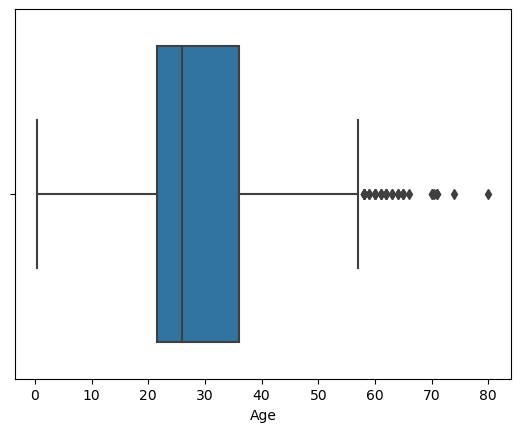

In [24]:
sns.boxplot(x=train_data['Age'])                   #to observe outliers through boxplot in Age Column

In [25]:
iqr_age=train_data['Age'].quantile(0.75)-train_data['Age'].quantile(0.25)
lowerlimit_age=train_data['Age'].quantile(0.25)-(1.5*iqr_age)
upperlimit_age=train_data['Age'].quantile(0.75)+(1.5*iqr_age)                #using IQR method for finding outliers
lowerlimit_age,upperlimit_age

(-0.25, 57.75)

In [26]:
train_data=train_data[(train_data['Age']>lowerlimit_age) & (train_data['Age']<upperlimit_age)]
#removing outliers

<Axes: xlabel='Age'>

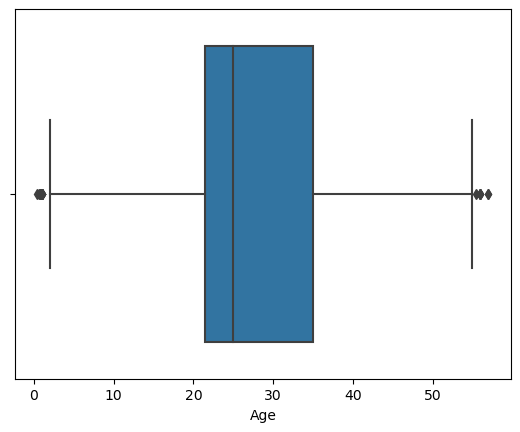

In [27]:
sns.boxplot(x=train_data['Age']) 

<Axes: xlabel='Fare'>

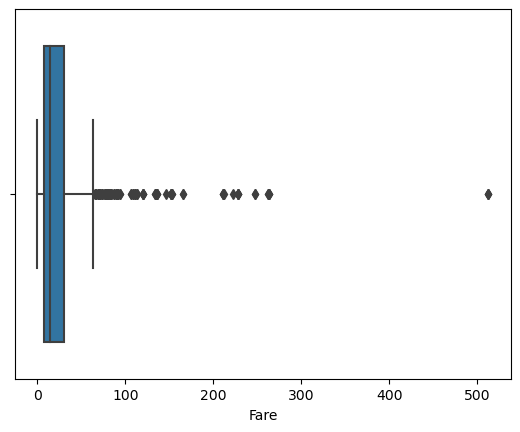

In [28]:
sns.boxplot(x=train_data['Fare'])                       #finding outliers in Fare Column

In [29]:
iqr_fare=train_data.Fare.quantile(0.75)-train_data.Fare.quantile(0.25)
lowerlimit_fare=train_data.Fare.quantile(0.25)-(1.5*iqr_age)
upperlimit_fare=train_data.Fare.quantile(0.75)+(1.5*iqr_age)                #using IQR method for finding outliers
lowerlimit_fare,upperlimit_fare

(-13.854199999999999, 52.25)

In [30]:
train_data=train_data[(train_data['Fare']>lowerlimit_age) & (train_data['Fare']<upperlimit_age)]
#removing outliers in Fare column

<Axes: xlabel='Fare'>

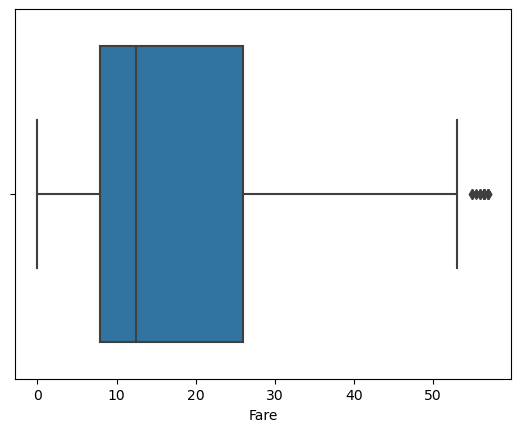

In [31]:
sns.boxplot(x=train_data['Fare'])                             

In [32]:
train_data.info()                                      #information of the cleaned data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 743 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  743 non-null    int64  
 1   Survived     743 non-null    int64  
 2   Pclass       743 non-null    int64  
 3   Name         743 non-null    object 
 4   Sex          743 non-null    object 
 5   Age          743 non-null    float64
 6   SibSp        743 non-null    int64  
 7   Parch        743 non-null    int64  
 8   Ticket       743 non-null    object 
 9   Fare         743 non-null    float64
 10  Cabin        743 non-null    object 
 11  Embarked     743 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 75.5+ KB


In [33]:
train_data.sample(10)                                #sample of random 10 rows of the data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
406,407,0,3,"Widegren, Mr. Carl/Charles Peter",male,51.0,0,0,347064,7.7500,B96 B98,S
206,207,0,3,"Backstrom, Mr. Karl Alfred",male,32.0,1,0,3101278,15.8500,B96 B98,S
772,773,0,2,"Mack, Mrs. (Mary)",female,57.0,0,0,S.O./P.P. 3,10.5000,E77,S
156,157,1,3,"Gilnagh, Miss. Katherine ""Katie""",female,16.0,0,0,35851,7.7333,B96 B98,Q
848,849,0,2,"Harper, Rev. John",male,28.0,0,1,248727,33.0000,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
283,284,1,3,"Dorking, Mr. Edward Arthur",male,19.0,0,0,A/5. 10482,8.0500,B96 B98,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,B96 B98,S
67,68,0,3,"Crease, Mr. Ernest James",male,19.0,0,0,S.P. 3464,8.1583,B96 B98,S
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,B96 B98,S


# Task 2 : Calculate summary statistics

In [34]:
import pandas as pd                                 #importing pandas Library

In [35]:
train_data.head()                                  #showing first 5 rows of the dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
5,6,0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,B96 B98,Q


In [36]:
print('Mean values of the dataset:' )
train_data.mean(numeric_only=True)                  #printing mean values of the dataset

Mean values of the dataset:


PassengerId    448.157470
Survived         0.340511
Pclass           2.518170
Age             27.147039
SibSp            0.449529
Parch            0.341857
Fare            17.173743
dtype: float64

In [37]:
print('Median values of the dataset:')
train_data.median(numeric_only=True)                 #printing median values of the dataset

Median values of the dataset:


PassengerId    449.000
Survived         0.000
Pclass           3.000
Age             25.000
SibSp            0.000
Parch            0.000
Fare            12.475
dtype: float64

In [38]:
print('standard deviation values of the dataset:')
train_data.std(numeric_only=True)                         #printing standard deviation values of the dataset 

standard deviation values of the dataset:


PassengerId    260.566723
Survived         0.474200
Pclass           0.707588
Age             11.415550
SibSp            0.913995
Parch            0.793478
Fare            12.793947
dtype: float64

In [39]:
train_data.var(numeric_only=True)                         #printing variance values of the dataset

PassengerId    67895.016949
Survived           0.224866
Pclass             0.500680
Age              130.314776
SibSp              0.835387
Parch              0.629607
Fare             163.685090
dtype: float64

In [40]:
train_data.describe()                                    #printing summary stats using describe()func

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000
mean,448.157470,0.340511,2.518170,27.147039,0.449529,0.341857,17.173743
std,260.566723,0.474200,0.707588,11.415550,0.913995,0.793478,12.793947
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,216.000000,0.000000,2.000000,21.500000,0.000000,0.000000,7.895800
50%,449.000000,0.000000,3.000000,25.000000,0.000000,0.000000,12.475000
75%,674.500000,1.000000,3.000000,34.000000,1.000000,0.000000,26.000000
max,891.000000,1.000000,3.000000,57.000000,5.000000,6.000000,57.000000


In [41]:
train_data.describe(include='all')                     #for all columns of different datatypes

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,743.000000,743.000000,743.000000,743,743,743.000000,743.000000,743.000000,743,743.000000,743,743
unique,NaN,NaN,NaN,743,2,NaN,NaN,NaN,603,NaN,76,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,506,NaN,NaN,NaN,7,NaN,642,563
mean,448.157470,0.340511,2.518170,NaN,NaN,27.147039,0.449529,0.341857,NaN,17.173743,NaN,NaN
std,260.566723,0.474200,0.707588,NaN,NaN,11.415550,0.913995,0.793478,NaN,12.793947,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,216.000000,0.000000,2.000000,NaN,NaN,21.500000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,449.000000,0.000000,3.000000,NaN,NaN,25.000000,0.000000,0.000000,NaN,12.475000,NaN,NaN
75%,674.500000,1.000000,3.000000,NaN,NaN,34.000000,1.000000,0.000000,NaN,26.000000,NaN,NaN


In [42]:
train_data.mode()                              #printing mode values of the dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3.0,"Abbing, Mr. Anthony",male,25.0,0.0,0.0,1601,8.05,B96 B98,S
1,3,NaN,NaN,"Abbott, Mr. Rossmore Edward",NaN,NaN,NaN,NaN,347082,NaN,NaN,NaN
2,4,NaN,NaN,"Abbott, Mrs. Stanton (Rosa Hunt)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,NaN,NaN,"Abelson, Mr. Samuel",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,NaN,NaN,"Abelson, Mrs. Samuel (Hannah Wizosky)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
738,887,NaN,NaN,"de Mulder, Mr. Theodore",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
739,888,NaN,NaN,"de Pelsmaeker, Mr. Alfons",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
740,889,NaN,NaN,"del Carlo, Mr. Sebastiano",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
741,890,NaN,NaN,"van Billiard, Mr. Austin Blyler",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
